In [27]:
#Import libraries
import joblib
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate 

In [10]:
#Load test data
X_test, y_test, y_pred = joblib.load("../models/test_data.pkl")

In [15]:
#Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1894
           1       0.95      0.97      0.96      1904

    accuracy                           0.96      3798
   macro avg       0.96      0.96      0.96      3798
weighted avg       0.96      0.96      0.96      3798



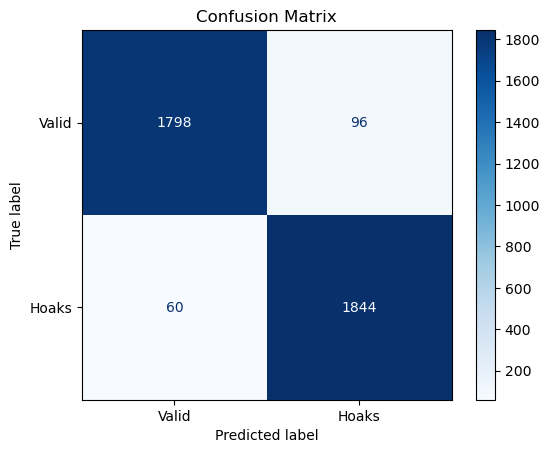

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Valid", "Hoaks"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

d:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at

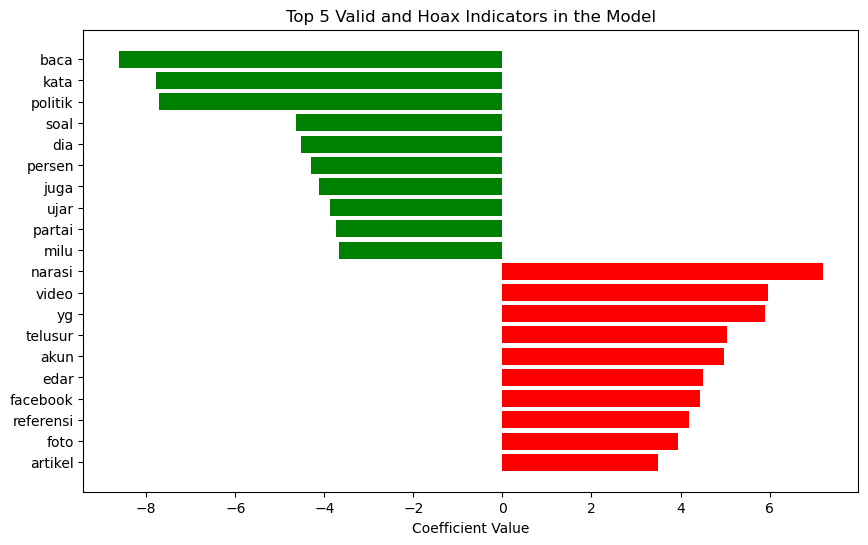

In [17]:
# Load vectorizer and model
vectorizer = joblib.load("../models/vectorizer.pkl")
model = joblib.load("../models/hoax_model.pkl")

# Get feature names and model coefficients
feature_names = np.array(vectorizer.get_feature_names_out())
coefficients = model.coef_[0]

# Get indices for top 5 negative (valid) and top 5 positive (hoax) words
top_negative_idx = np.argsort(coefficients)[:10]     # Most negative = strong valid indicator
top_positive_idx = np.argsort(coefficients)[-10:][::-1]  # Most positive = strong hoax indicator

# Combine indices and get corresponding words and coefficients
top_indices = np.concatenate([top_negative_idx, top_positive_idx])
top_words = feature_names[top_indices]
top_coefficients = coefficients[top_indices]

# Color coding: green for valid, red for hoax
colors = ['green'] * 10 + ['red'] * 10

# Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_words, top_coefficients, color=colors)
plt.xlabel("Coefficient Value")
plt.title("Top 5 Valid and Hoax Indicators in the Model")
plt.gca().invert_yaxis()  # Show strongest feature at the top
plt.show()


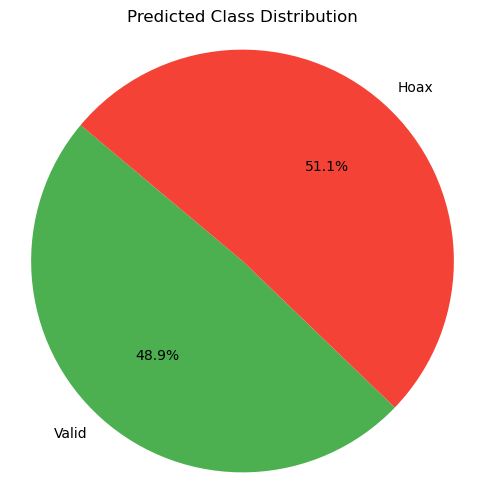

In [18]:
#Pie Chart of predicted classes
pred_counts = pd.Series(y_pred).value_counts().sort_index()
labels = ['Valid', 'Hoax']
sizes = [pred_counts.get(0, 0), pred_counts.get(1, 0)]
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Predicted Class Distribution")
plt.axis('equal')
plt.show()

In [13]:
X_text_test, y_test, y_pred = joblib.load("../models/test_data.pkl")

In [ ]:
# Convert numeric labels to text (e.g., 0 → Valid, 1 → Hoax)
label_map = {0: "Valid", 1: "Hoax"}

# Create results DataFrame
results_df = pd.DataFrame({
    "Text": pd.Series(X_text_test).reset_index(drop=True).str.slice(0, 70) + "...",
    "True Label": y_test.reset_index(drop=True).map(label_map),
    "Predicted": pd.Series(y_pred).map(label_map)
})

# Filter misclassified and sample 5
misclassified = results_df[results_df["True Label"] != results_df["Predicted"]].sample(5)

# Print tidy table
print(tabulate(misclassified, headers="keys", tablefmt="fancy_grid", showindex=True))


╒══════╤═══════════════════════════════════════════════════════════════════════════╤══════════════╤═════════════╕
│      │ Text                                                                      │ True Label   │ Predicted   │
╞══════╪═══════════════════════════════════════════════════════════════════════════╪══════════════╪═════════════╡
│ 2705 │ jokowi ingat ancam kemarau dan sakit mulut dan kuku luka seperti saria... │ Valid        │ Hoax        │
├──────┼───────────────────────────────────────────────────────────────────────────┼──────────────┼─────────────┤
│  459 │ art kelapa gading tewas toren oksigen jakarta kompascom dasar hasil ot... │ Valid        │ Hoax        │
├──────┼───────────────────────────────────────────────────────────────────────────┼──────────────┼─────────────┤
│ 2668 │ suplemen manfaat lancar edar darah kompascom suplemen konsumsi lancar ... │ Valid        │ Hoax        │
├──────┼───────────────────────────────────────────────────────────────────────────┼────